In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Сравниваем рейтинги Fandango и другие пользовательские рейтинги

Сначала давайте изучим рейтинги Fandango и посмотрим, совпадут ли результаты нашего анализа с выводами в статье.

In [ ]:
fandango = pd.read_csv("fandango_scrape.csv")

In [ ]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


**Давайте изучим связь между популярностью фильма и его рейтингом. Нарисуем график scatterplot, показывающий связь между колонками RATING и VOTES.**

<Axes: xlabel='RATING', ylabel='VOTES'>

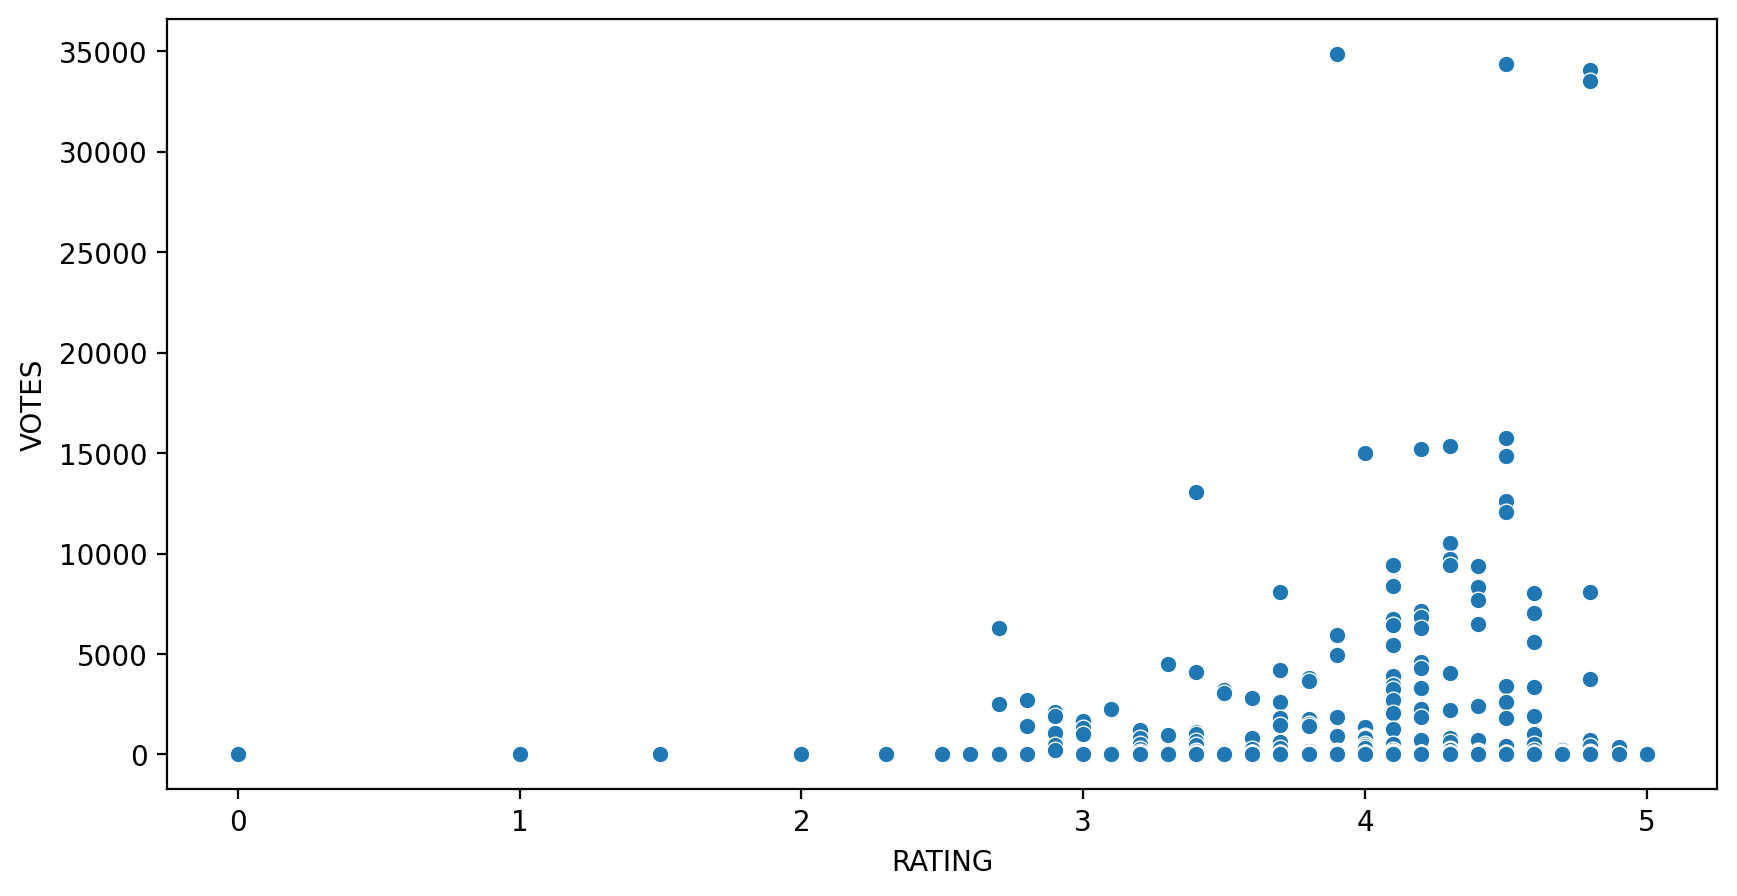

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
sns.scatterplot(data=fandango, x="RATING", y="VOTES")

In [ ]:
fandango.corr()

<ipython-input-8-b65df3b6d08c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [ ]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x: x[-5:-1])
print(fandango[['YEAR', 'FILM']])

     YEAR                                  FILM
0    2015           Fifty Shades of Grey (2015)
1    2015                 Jurassic World (2015)
2    2015                American Sniper (2015)
3    2015                      Furious 7 (2015)
4    2015                     Inside Out (2015)
..    ...                                   ...
499  2015                      Valiyavan (2015)
500  2015            WWE SummerSlam 2015 (2015)
501  2015       Yagavarayinum Naa Kaakka (2015)
502  1964  Yesterday, Today and Tomorrow (1964)
503  2012                         Zarafa (2012)

[504 rows x 2 columns]


In [ ]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<Axes: xlabel='YEAR', ylabel='Count'>

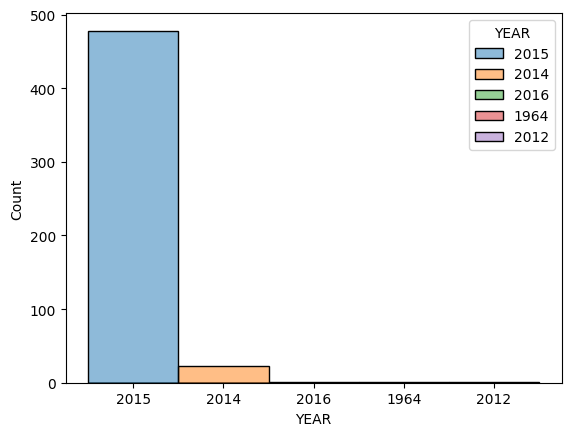

In [ ]:
sns.histplot(data=fandango, x='YEAR', hue='YEAR')

In [ ]:
fandango.sort_values('VOTES', ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Сколько фильмов имеет нулевое количество голосов (votes)?**

In [ ]:
v0 = fandango.sort_values('VOTES', ascending=True)
index = (v0['VOTES'] > 0).idxmax()
v0 = v0.loc[:index, :]
print(v0.shape[0] - 1)

69


**Создадим DataFrame только с теми фильмами, которые имеют голоса (votes) - то есть, удалим те фильмы, у которых нет ни одного голоса.**

In [ ]:
wv = fandango.sort_values('VOTES', ascending=True)
wv = wv.loc[index:, :]
print(wv)

                            FILM  STARS  RATING  VOTES  YEAR
414           Buggs Bunny (2015)    4.0     4.0      1  2015
409             Nannbenda (2015)    3.0     3.0      1  2015
413         Wild Canaries (2015)    3.0     3.0      1  2015
412            The Living (2015)    3.0     3.0      1  2015
411  The Face of an Angel (2015)    3.0     3.0      1  2015
..                           ...    ...     ...    ...   ...
4              Inside Out (2015)    4.5     4.5  15749  2015
3               Furious 7 (2015)    5.0     4.8  33538  2015
2         American Sniper (2015)    5.0     4.8  34085  2015
1          Jurassic World (2015)    4.5     4.5  34390  2015
0    Fifty Shades of Grey (2015)    4.0     3.9  34846  2015

[435 rows x 5 columns]


----

**Создадим график KDE plot (или несколько таких графиков), который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING). Обрежем диапазон KDE в пределах 0-5.**

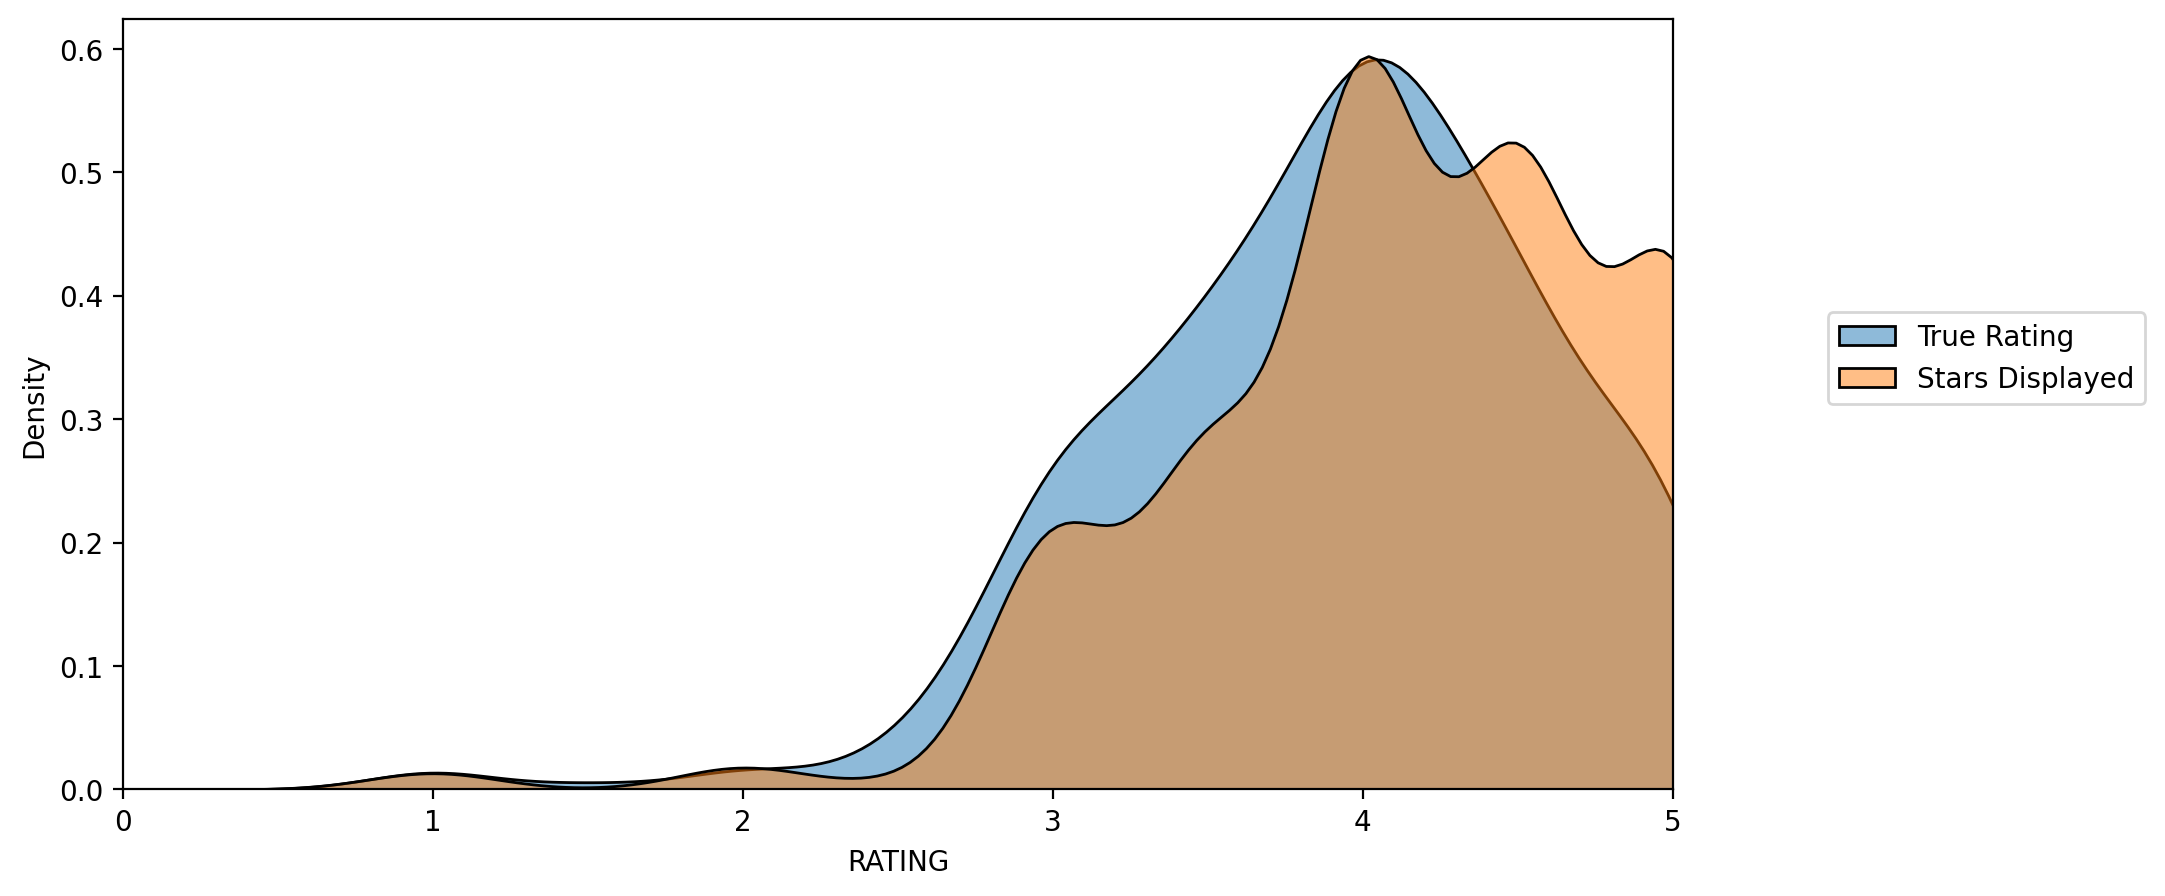

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
sns.kdeplot(data=wv, x="RATING", multiple="stack", alpha=0.5)
sns.kdeplot(data=wv, x="STARS", multiple="stack", alpha=0.5)
plt.xlim(0, 5)
plt.legend(['True Rating', 'Stars Displayed'], loc=(1.1, 0.5))

**Теперь давайте посчитаем эту разницу в численном виде; Создадим новую колонку, в которой сохраним разницу между колонками STARS и RATING с помощью обычного вычитания STARS-RATING, а также выполним округление до одной десятичной цифры после запятой.**

In [ ]:
wv['STARS_DIFF'] = round(wv['STARS'] - wv['RATING'], 1)
print(wv)

                            FILM  STARS  RATING  VOTES  YEAR  STARS_DIFF
414           Buggs Bunny (2015)    4.0     4.0      1  2015         0.0
409             Nannbenda (2015)    3.0     3.0      1  2015         0.0
413         Wild Canaries (2015)    3.0     3.0      1  2015         0.0
412            The Living (2015)    3.0     3.0      1  2015         0.0
411  The Face of an Angel (2015)    3.0     3.0      1  2015         0.0
..                           ...    ...     ...    ...   ...         ...
4              Inside Out (2015)    4.5     4.5  15749  2015         0.0
3               Furious 7 (2015)    5.0     4.8  33538  2015         0.2
2         American Sniper (2015)    5.0     4.8  34085  2015         0.2
1          Jurassic World (2015)    4.5     4.5  34390  2015         0.0
0    Fifty Shades of Grey (2015)    4.0     3.9  34846  2015         0.1

[435 rows x 6 columns]


**Нарисуем график count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

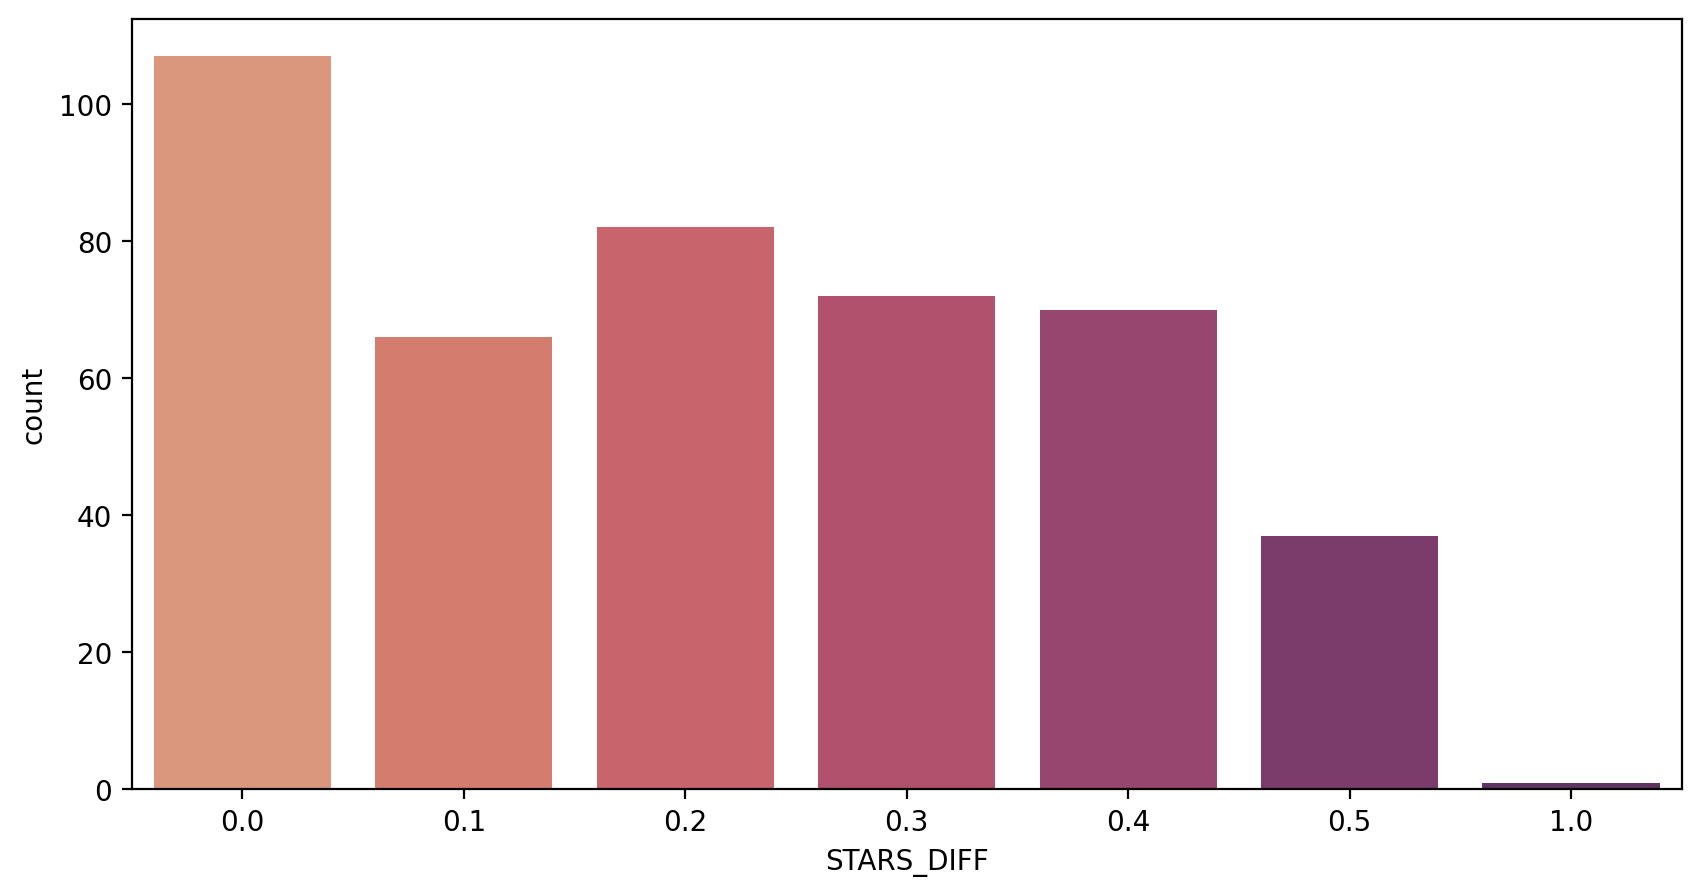

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(data=wv, x='STARS_DIFF', palette='flare')

**На этом графике мы видим, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом! Найдем этот фильм.**

In [ ]:
print(wv.loc[wv['STARS_DIFF'] == 1.0, :])

                 FILM  STARS  RATING  VOTES  YEAR  STARS_DIFF
381  Turbo Kid (2015)    5.0     4.0      2  2015         1.0


## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.

In [ ]:
all_sites = pd.read_csv("all_sites_scores.csv")

**Изучим общие свойства полученного объекта DataFrame.**

In [ ]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [ ]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги.

**Нарисуем график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

(0.0, 100.0)

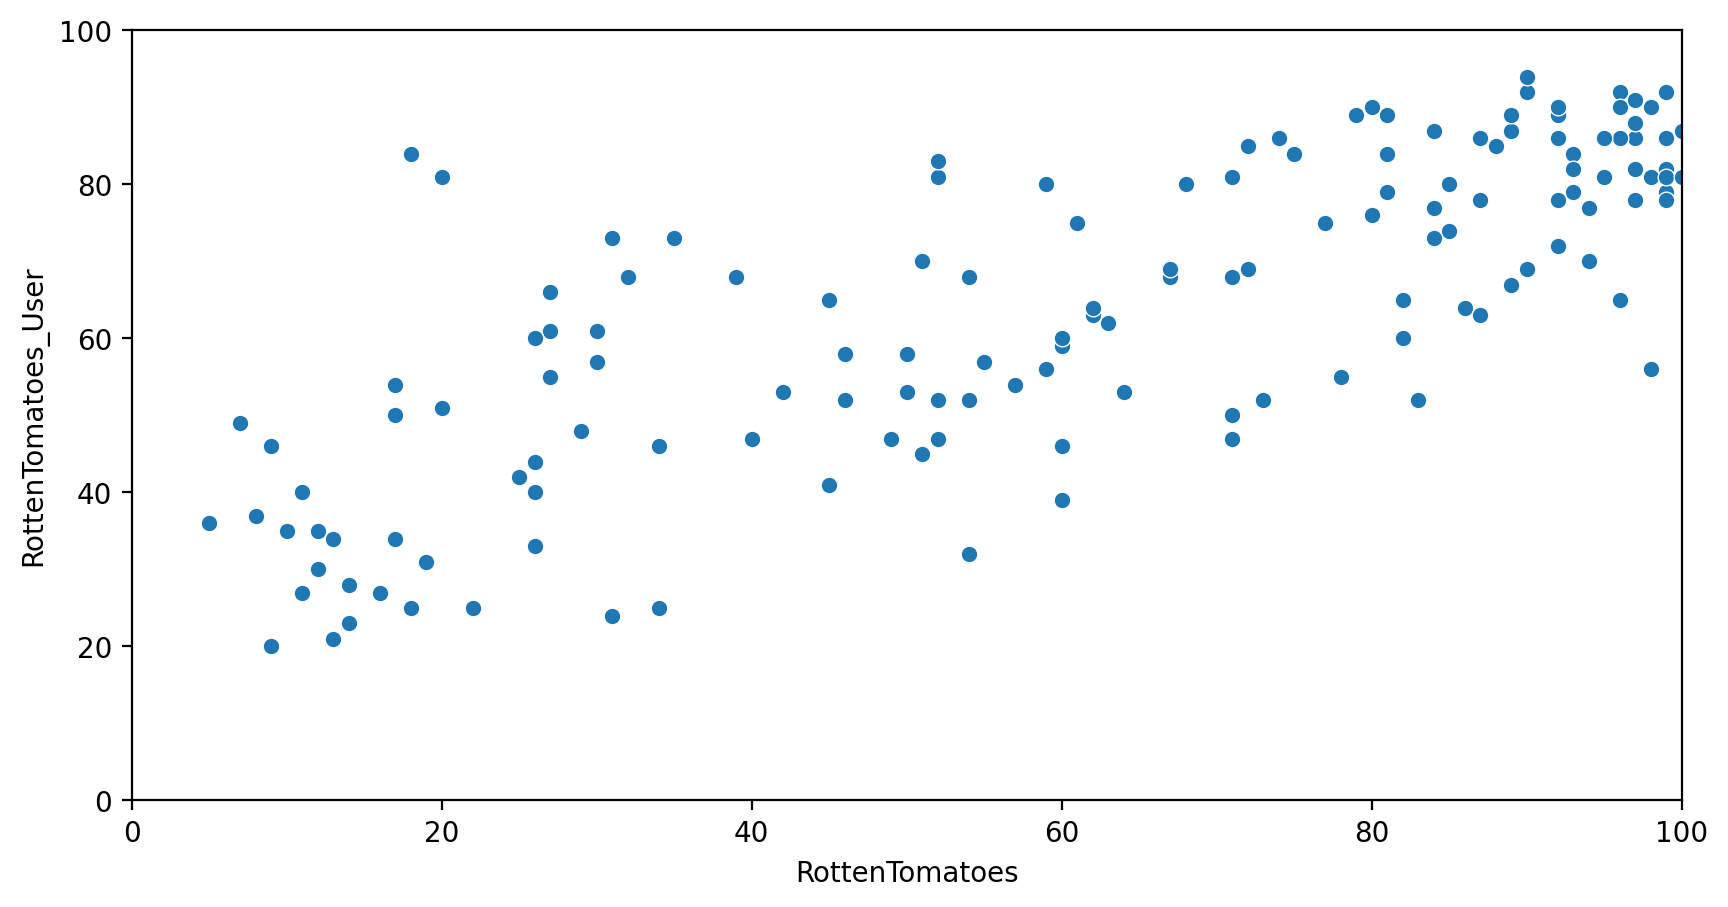

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.ylim(0, 100)
plt.xlim(0, 100)

Давайте изучим численную разницу между этими двумя рейтингами. Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

**Создадим новую колонку, в которой сохраним разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes. Используем формулу RottenTomatoes-RottenTomatoes_User.**

In [ ]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

**Вычислим среднюю абсолютную разницу между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes, согласно описанию выше.**

In [ ]:
a = all_sites['Rotten_Diff'].apply(lambda x: x * -1 if x < 0 else x)
a.mean()

15.095890410958905

**Нарисуем график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes. На этом графике будут отрицательные значения.**

In [ ]:
xdis = []
xdisstr = []
for i in range (-60, 60, 20):
  xdis.append(i)
  xdisstr.append(str(i))

<Axes: xlabel='Rotten_Diff', ylabel='Density'>

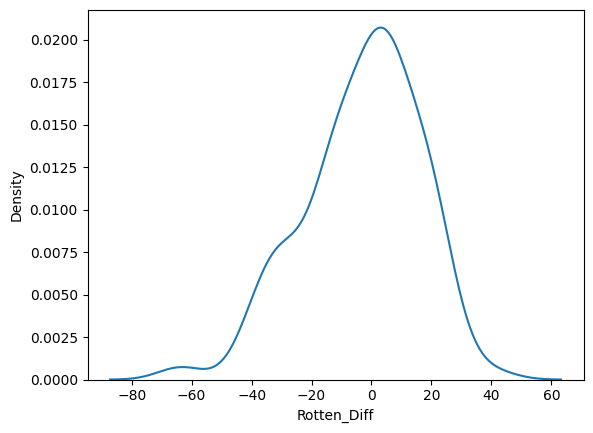

In [ ]:
sns.kdeplot(data=all_sites, x='Rotten_Diff')

<Axes: xlabel='Rotten_Diff', ylabel='count'>

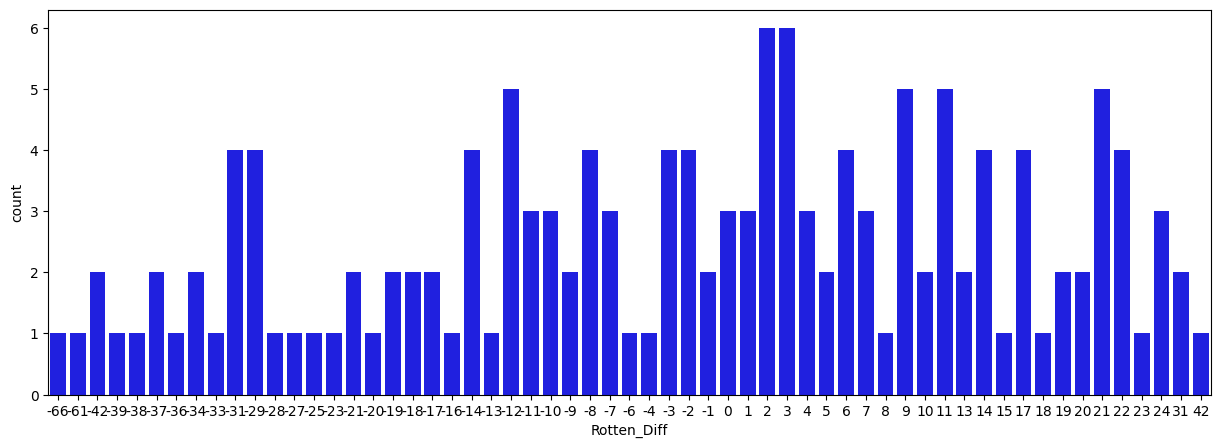

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=all_sites, x='Rotten_Diff', color='blue')

**Далее нарисуем график распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

Text(0.5, 1.0, 'Abs Difference between RT Critics Score and RT User Score')

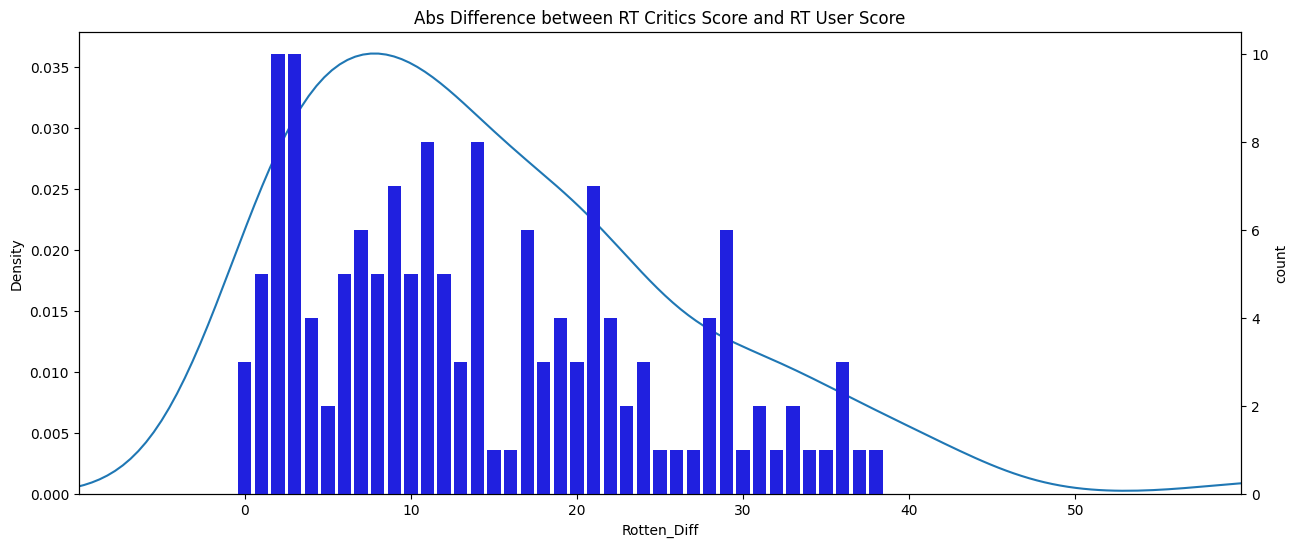

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.kdeplot(data=all_sites, x=a, ax=ax)
ax2 = ax.twinx()
sns.countplot(data=all_sites, x=a, ax=ax2, color='blue')
plt.xlim(-10, 60)
plt.xticks([0, 10, 20, 30, 40, 50], ['0', '10', '20', '30', '40', '50'])
plt.title('Abs Difference between RT Critics Score and RT User Score')

**Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведим 5 фильмов с наибольшей по модулю *отрицательной* разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.**

**Какие 5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков:**

In [ ]:
print('Users Love but Critics Hate')
s_r_d = all_sites.sort_values('Rotten_Diff').head()
print(s_r_d[['FILM', 'Rotten_Diff']])

Users Love but Critics Hate
                          FILM  Rotten_Diff
3       Do You Believe? (2015)          -66
85           Little Boy (2015)          -61
134    The Longest Ride (2015)          -42
105    Hitman: Agent 47 (2015)          -42
125  The Wedding Ringer (2015)          -39


**Далее наоборот - отобразим 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.**

In [ ]:
print('Critics Love but Users Hate')
s_r_d = all_sites.sort_values('Rotten_Diff', ascending=False).head()
print(s_r_d[['FILM', 'Rotten_Diff']])

Critics Love but Users Hate
                                   FILM  Rotten_Diff
69                    Mr. Turner (2014)           42
112                   It Follows (2015)           31
115            While We're Young (2015)           31
145  Kumiko, The Treasure Hunter (2015)           24
37                 Welcome to Me (2015)           24


## Рейтинги от MetaCritic

Далее давайте быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

**Нарисуем график scatterplot для сравнения рейтингов Metacritic и Metacritic User.**

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

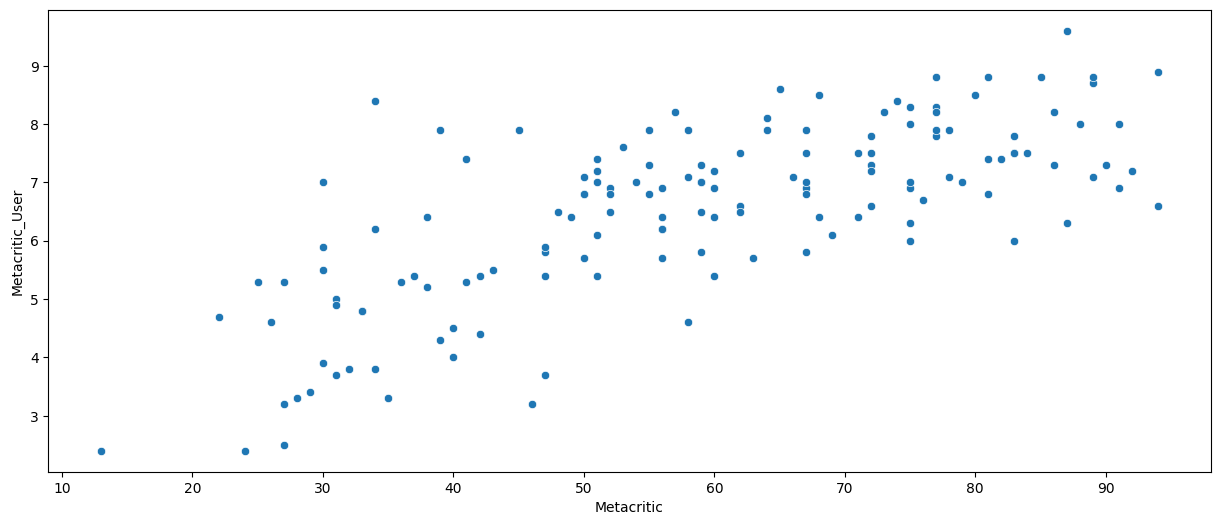

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')

## Рейтинги от IMDB

И наконец, посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

**Нарисуем график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

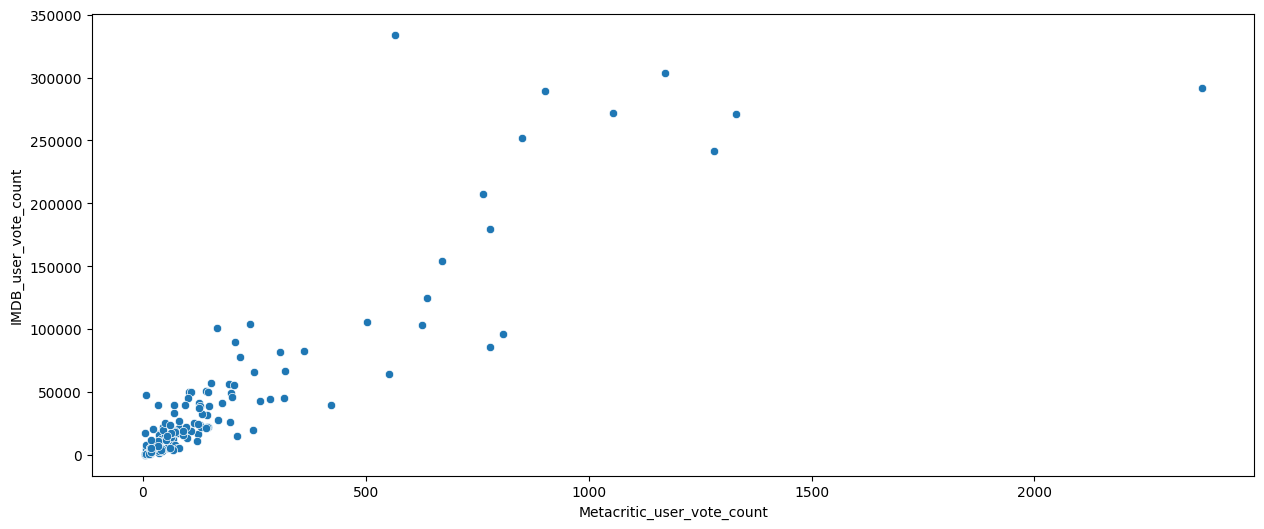

In [ ]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
plt.figure(figsize=(15, 6))
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

**Здесь мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic. Что это за фильм?**

**Какой фильм получил наибольшее количество голосов на IMDB?**

In [ ]:
all_sites.loc[all_sites['IMDB_user_vote_count'] == all_sites['IMDB_user_vote_count'].max(), :]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Какой фильм получил наибольшее количество голосов на Metacritic?**

In [ ]:
all_sites.loc[all_sites['Metacritic_user_vote_count'] == all_sites['Metacritic_user_vote_count'].max(), :]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**Объединим таблицу fandango с таблицей all_sites. Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов. Но мы хотим сравнивать только те фильмы, которые есть в обеих таблицах. Поэтому сделаем объединение "*inner* merge" двух наборов данных, сопоставляя строки по колонке FILM.**

In [ ]:
con = fandango.merge(all_sites, how='inner', on='FILM')

In [ ]:
con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [ ]:
con.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Обратите внимание, что компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

**Добавим дополнительные колонки в all_sites, и запишем в них нормализованные значения рейтингов от 0 до 5.**

In [ ]:
con['RT_Norm'] = round(con['RottenTomatoes'] / 20, 1)
con['RTU_Norm'] = round(con['RottenTomatoes_User'] / 20, 1)
con['Meta_Norm'] = round(con['Metacritic'] / 20, 1)
con['Meta_U_Norm'] = round(con['Metacritic_User'] / 2, 1)
con['IMDB_Norm'] = round(con['IMDB'] / 2, 1)
print(con.head())

                          FILM  STARS  RATING  VOTES  YEAR  RottenTomatoes  \
0  Fifty Shades of Grey (2015)    4.0     3.9  34846  2015              25   
1        Jurassic World (2015)    4.5     4.5  34390  2015              71   
2       American Sniper (2015)    5.0     4.8  34085  2015              72   
3             Furious 7 (2015)    5.0     4.8  33538  2015              81   
4            Inside Out (2015)    4.5     4.5  15749  2015              98   

   RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0                   42          46              3.2   4.2   
1                   81          59              7.0   7.3   
2                   85          72              6.6   7.4   
3                   84          67              6.8   7.4   
4                   90          94              8.9   8.6   

   Metacritic_user_vote_count  IMDB_user_vote_count  Rotten_Diff  RT_Norm  \
0                         778                179506          -17      1.2   
1         

**Далее создадим DataFrame с названием norm_scores, в котором оставьте только нормализованные рейтинги. Также оставим колонки STARS и RATING из исходной таблицы fandango.**

In [ ]:
norm_scores = con[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [ ]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Сравнение распределений рейтингов от разных компаний


А теперь момент истины! Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?


**Нарисуем график, сравнивающий распределения нормализованных рейтингов от всех компаний.**

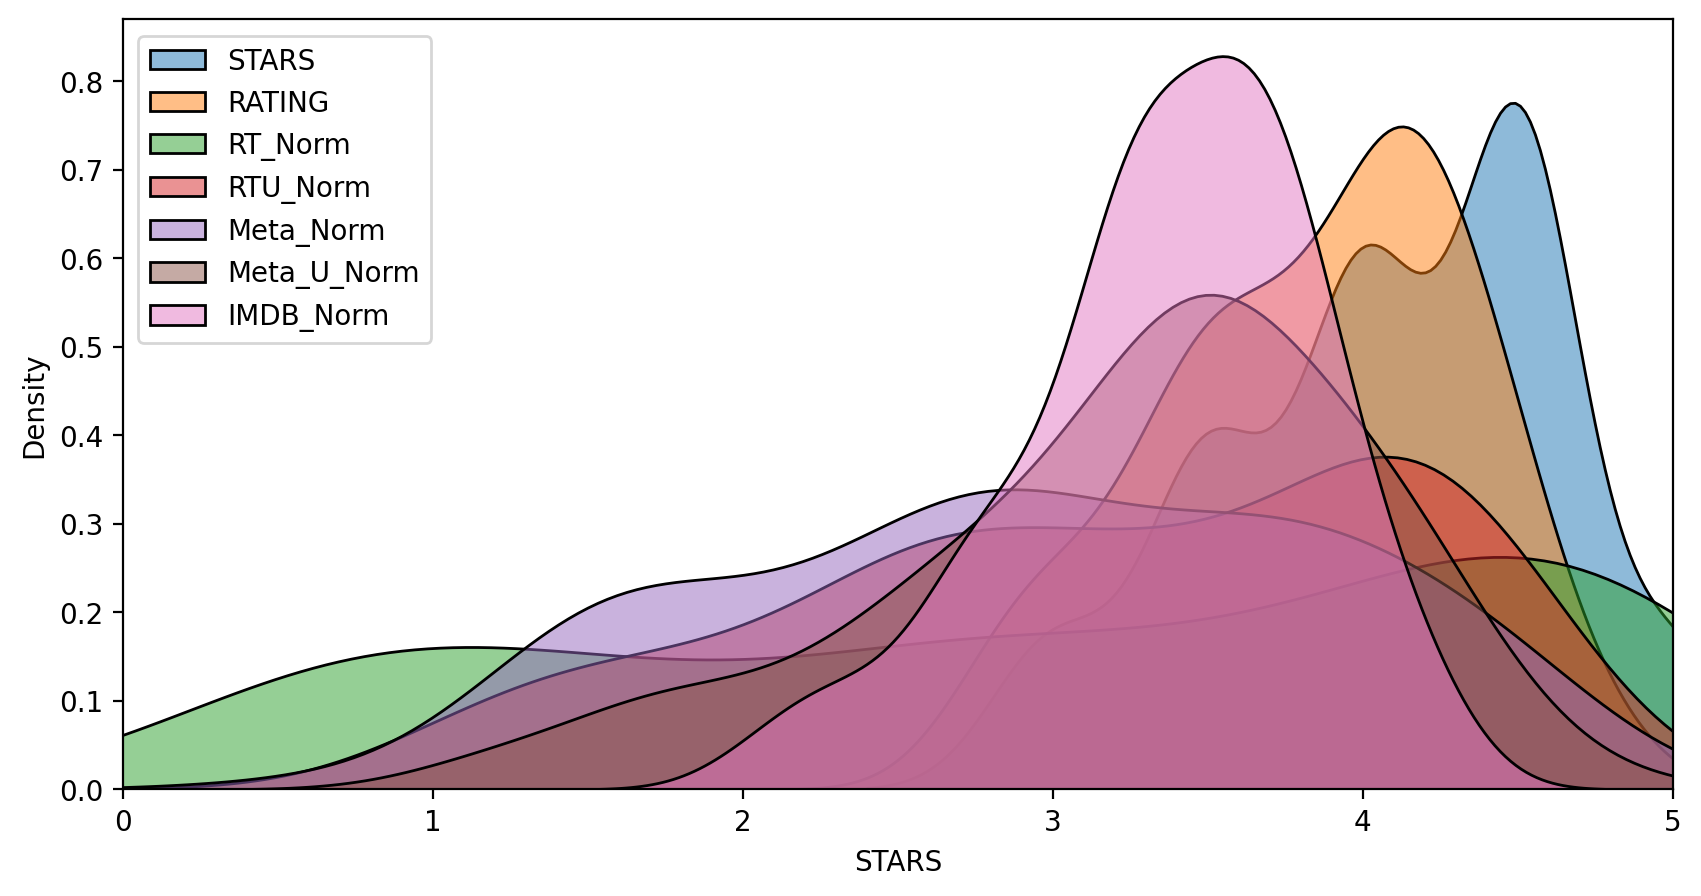

In [ ]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕ
plt.figure(figsize=(10, 5), dpi=200)
sns.kdeplot(data=norm_scores, x='STARS', multiple="stack", alpha=0.5)
sns.kdeplot(data=norm_scores, x="RATING", multiple="stack", alpha=0.5)
sns.kdeplot(data=norm_scores, x="RT_Norm", multiple="stack", alpha=0.5)
sns.kdeplot(data=norm_scores, x="RTU_Norm", multiple="stack", alpha=0.5)
sns.kdeplot(data=norm_scores, x="Meta_Norm", multiple="stack", alpha=0.5)
sns.kdeplot(data=norm_scores, x="Meta_U_Norm", multiple="stack", alpha=0.5)
sns.kdeplot(data=norm_scores, x="IMDB_Norm", multiple="stack", alpha=0.5)
plt.xlim(0, 5)
plt.legend(norm_scores, loc=(0.01, 0.58))

**Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.**

**Нарисуем график KDE plot, сравнивающий распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango.**

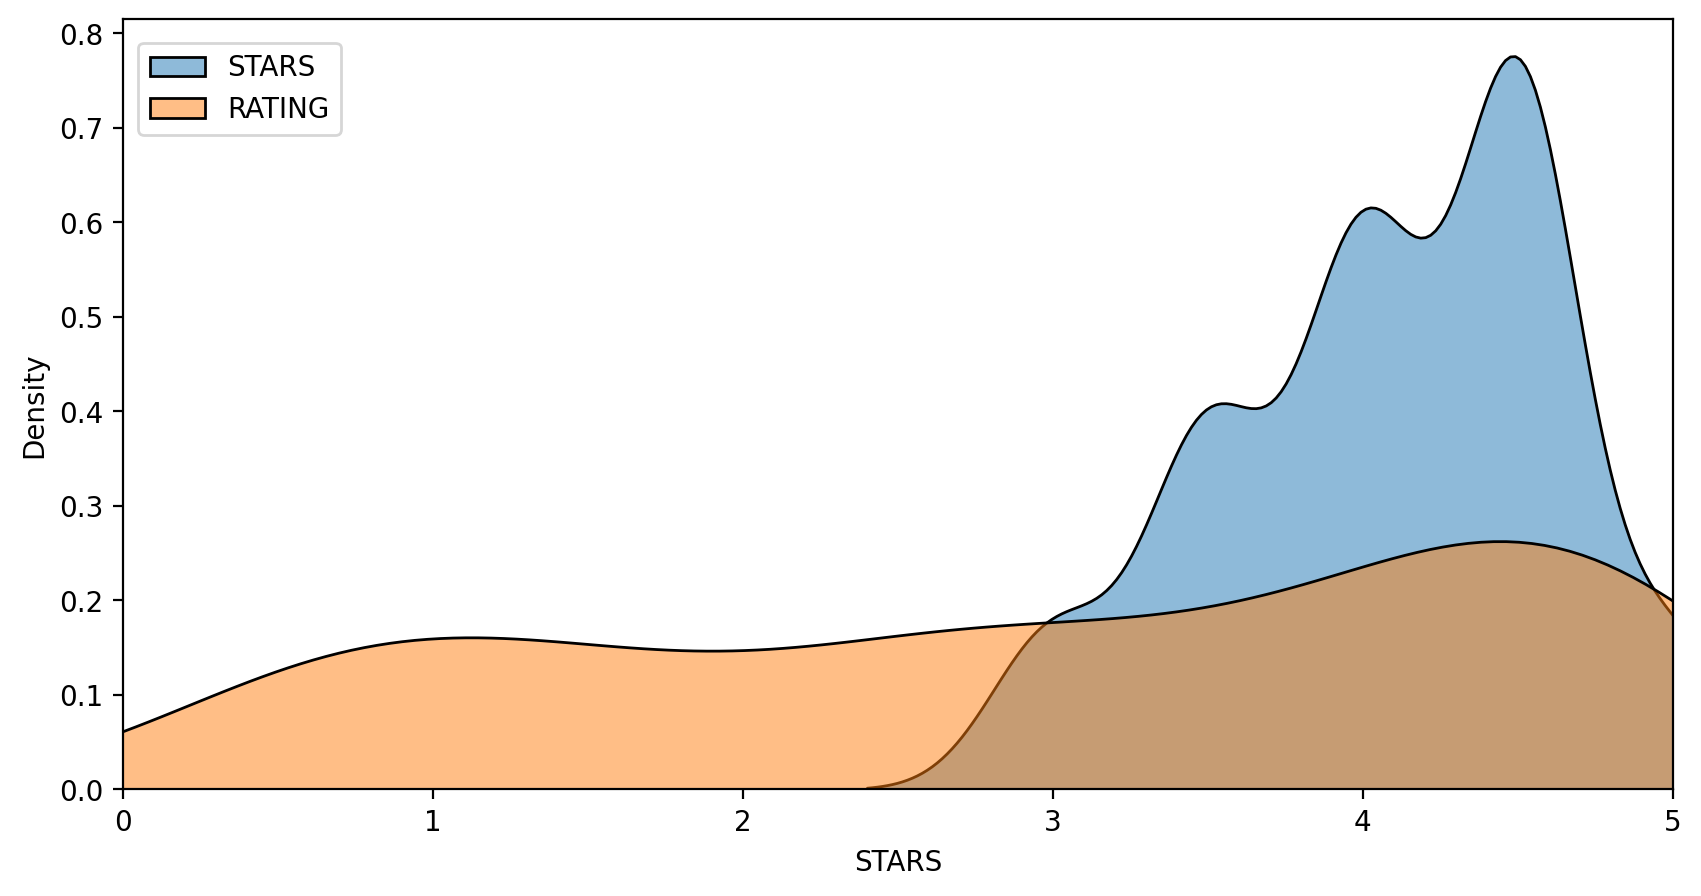

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
sns.kdeplot(data=norm_scores, x='STARS', multiple="stack", alpha=0.5)
sns.kdeplot(data=norm_scores, x="RT_Norm", multiple="stack", alpha=0.5)
plt.xlim(0, 5)
plt.legend(norm_scores, loc=(0.01, 0.85))

**Нарисуем график histplot, сравнивающий все нормализованные рейтинги.**

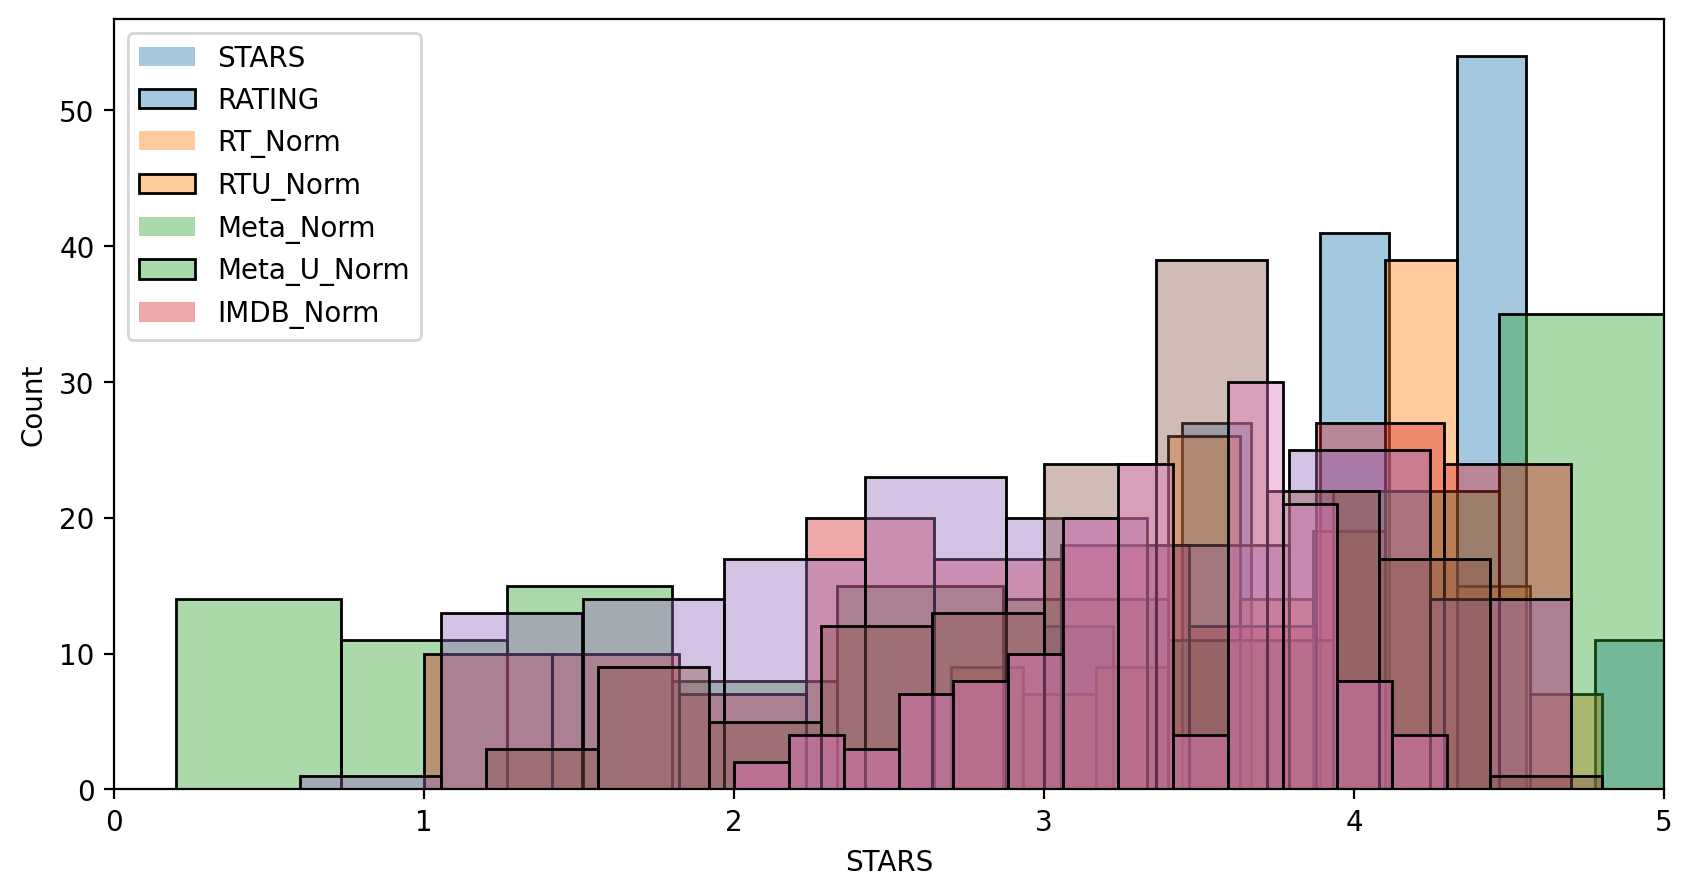

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
sns.histplot(data=norm_scores, x='STARS', alpha=0.4)
sns.histplot(data=norm_scores, x="RATING", alpha=0.4)
sns.histplot(data=norm_scores, x="RT_Norm", alpha=0.4)
sns.histplot(data=norm_scores, x="RTU_Norm", alpha=0.4)
sns.histplot(data=norm_scores, x="Meta_Norm", alpha=0.4)
sns.histplot(data=norm_scores, x="Meta_U_Norm", alpha=0.4)
sns.histplot(data=norm_scores, x="IMDB_Norm", alpha=0.4)
plt.xlim(0, 5)
plt.legend(norm_scores)


### Как различные компании оценивают фильмы с наименьшими рейтингами?

**Нарисуем график clustermap для всех нормализованных рейтингов. Обратите внимание на отличия в рейтингах между разными компаниями. Фильмы с высокими рейтингами должны попадать в одни кластеры, а фильмы с низкими рейтингами в другие кластеры.**

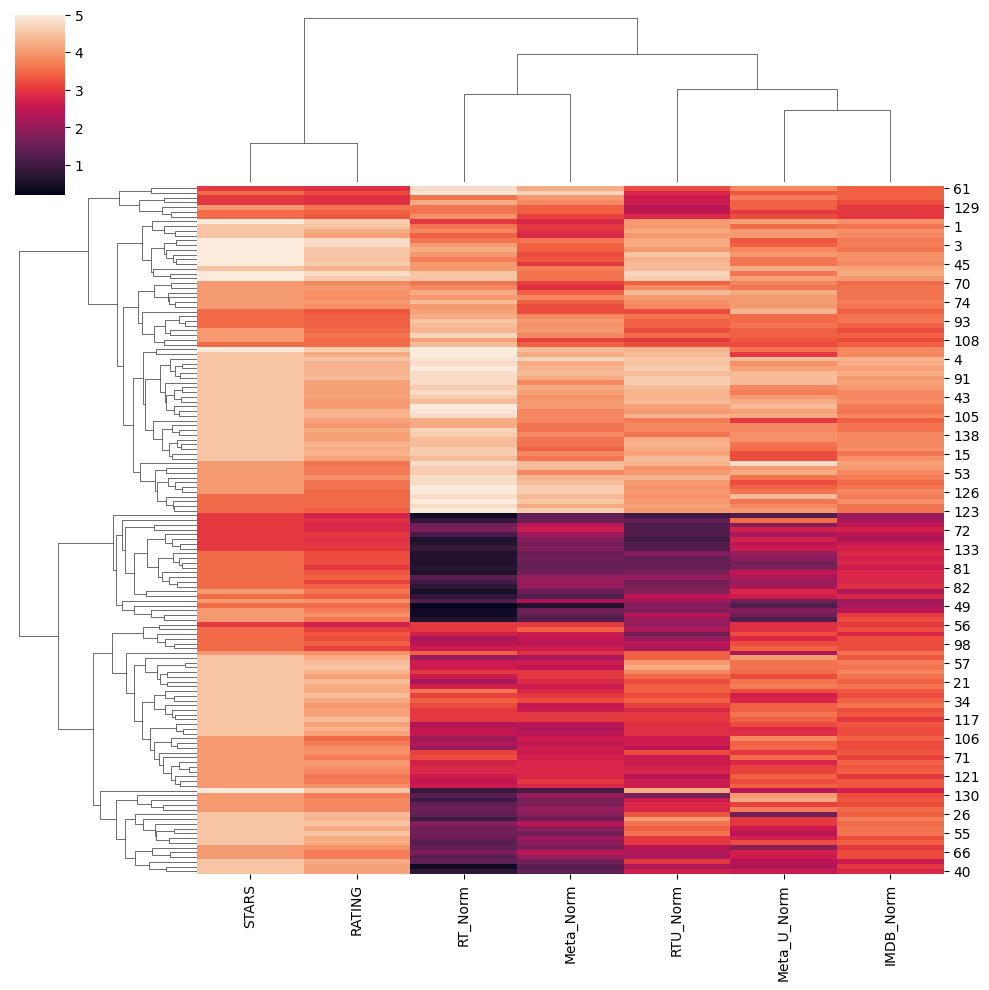

In [ ]:
sns.clustermap(data=norm_scores)

**Мы видели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании?**

In [ ]:
norm_scores['FILM'] = con['FILM']
worst_rt_norm = norm_scores.sort_values('RT_Norm', ascending=True).head(10)

<ipython-input-46-525ec67b9446>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_scores['FILM'] = con['FILM']


In [ ]:
print(worst_rt_norm)

     STARS  RATING  RT_Norm  RTU_Norm  Meta_Norm  Meta_U_Norm  IMDB_Norm  \
49     3.5     3.5      0.2       1.8        0.6          1.2        2.2   
25     4.5     4.1      0.4       2.3        1.3          2.3        3.0   
28     3.0     2.7      0.4       1.0        1.4          1.2        2.0   
84     4.0     3.9      0.4       2.4        1.4          1.6        3.0   
54     4.0     3.7      0.4       1.8        1.6          1.8        2.4   
50     4.0     3.6      0.5       1.8        1.5          2.8        2.3   
109    3.0     2.9      0.6       1.0        1.8          2.7        2.3   
88     4.0     3.6      0.6       2.0        1.2          1.2        3.2   
87     3.5     3.2      0.6       1.4        1.6          1.9        2.7   
83     3.5     3.3      0.6       1.7        1.6          2.5        2.8   

                              FILM  
49   Paul Blart: Mall Cop 2 (2015)  
25                  Taken 3 (2015)  
28           Fantastic Four (2015)  
84         Hitm

**Визуализируем распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.**

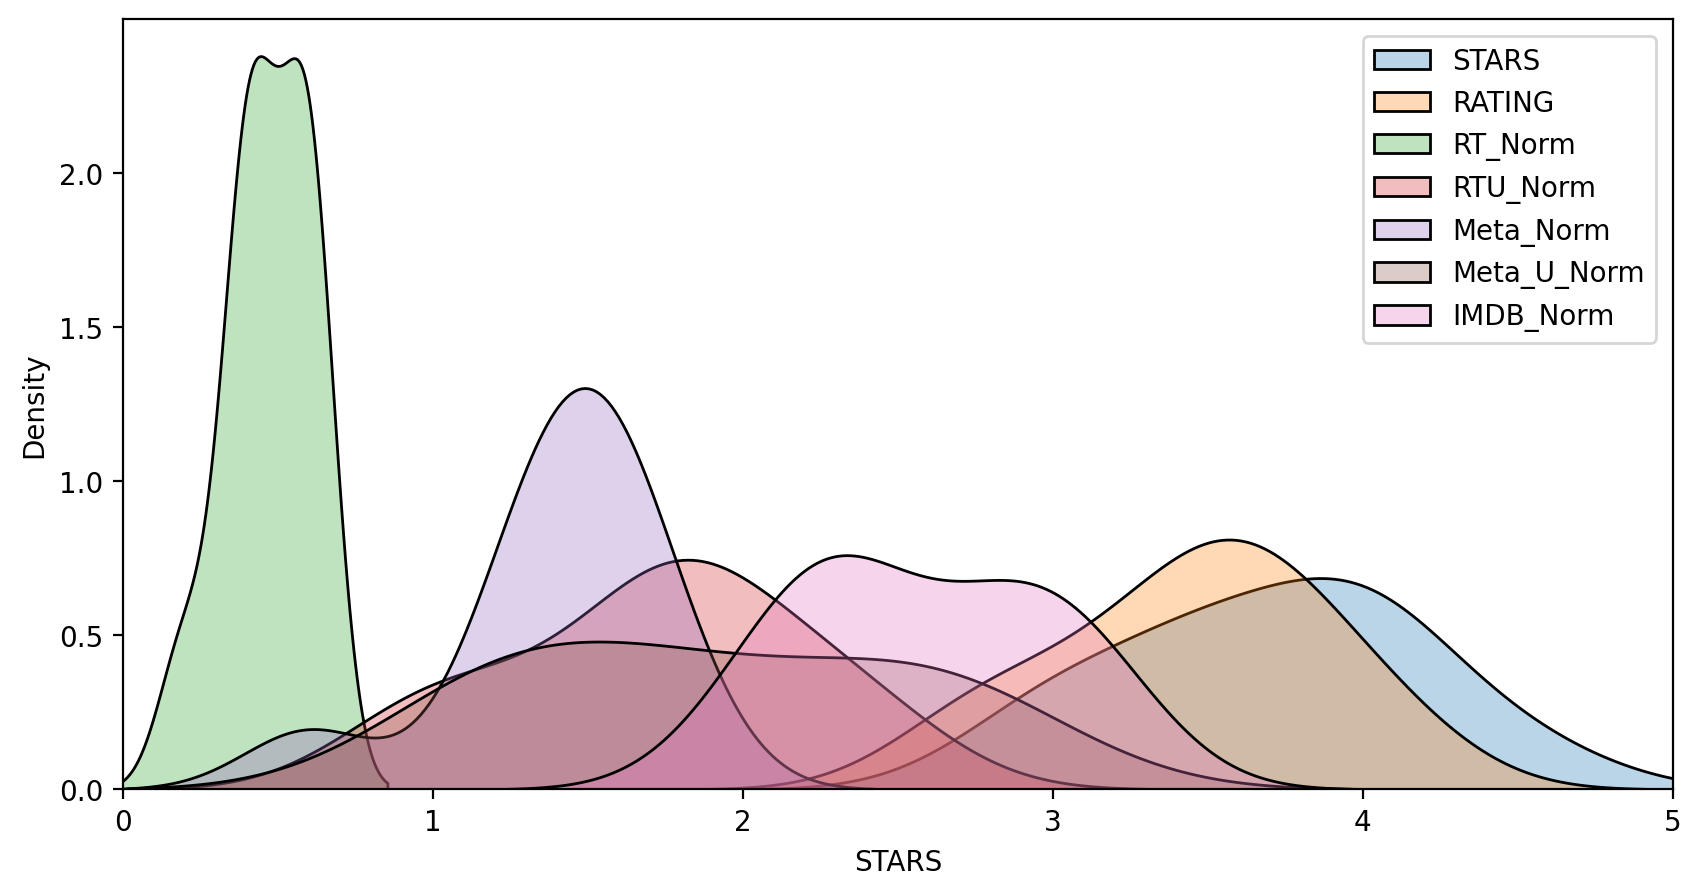

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
sns.kdeplot(data=worst_rt_norm, x='STARS', multiple="stack", alpha=0.3)
sns.kdeplot(data=worst_rt_norm, x="RATING", multiple="stack", alpha=0.3)
sns.kdeplot(data=worst_rt_norm, x="RT_Norm", multiple="stack", alpha=0.3)
sns.kdeplot(data=worst_rt_norm, x="RTU_Norm", multiple="stack", alpha=0.3)
sns.kdeplot(data=worst_rt_norm, x="Meta_Norm", multiple="stack", alpha=0.3)
sns.kdeplot(data=worst_rt_norm, x="Meta_U_Norm", multiple="stack", alpha=0.3)
sns.kdeplot(data=worst_rt_norm, x="IMDB_Norm", multiple="stack", alpha=0.3)
plt.xlim(0, 5)
plt.legend(norm_scores, loc=(0.8, 0.58))

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Выводы: вот это да! Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!**  
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний!**

In [ ]:
worst_rt_norm.loc[worst_rt_norm['FILM'] == 'Taken 3 (2015)', :]

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)


In [ ]:
worst_rt_norm.loc[25, ['RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']].mean()

1.86